In [1]:
## Import Packages
import numpy as np
import _pickle as pk
import warnings
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib as mpl
import matplotlib.gridspec as gridspec

#plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=35,**{'family':'sans-serif','sans-serif':['Arial']})
#mpl.rc('text', usetex=True)
#mpl.rcParams['mathtext.rm'] = 'Arial'
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
%matplotlib inline

In [18]:
Source = '/Volumes/eSSD0/Papers/GMD_CanESM_p1/'
mods = ['CanESM2','CanESM5_p2']
tas = dict()
fluxes = dict()
for m in range(len(mods)):
    tas[mods[m]] = pk.load(open(Source+\
    'Data/'+mods[m]+'/ERF/'+mods[m]+'_TAS_GAM.pi','rb'))
    
    fluxes[mods[m]] = pk.load(open(Source+\
    'Data/'+mods[m]+'/Fluxes/'+mods[m]+'_ALL_uFLUXES_GAM.pi','rb'))
    
    fluxes[mods[m]]['TEMP_FLUX'] = dict()
    
for models in fluxes.keys():
    for eb in fluxes[models].keys():
        for kernel in fluxes[models][eb].keys():
            fluxes[models]['TEMP_FLUX'][kernel] = \
            fluxes[models]['PLANCK_FLUX'][kernel]+fluxes[models]['LAPSE_FLUX'][kernel]
            
fluxes_std = dict()
fluxes_mn = dict()
for models in fluxes.keys():
    fluxes_std[models] = dict()
    fluxes_mn[models] = dict()
    for eb in fluxes[models].keys():
        
        fluxes[models][eb].pop('ECHAM6_ctr')
        fluxes[models][eb].pop('CAM3')
        fluxes[models][eb].pop('CAM5')
        
        fluxes_std[models][eb] = np.std(list(fluxes[models][eb].values()),axis=0)
        fluxes_mn[models][eb] = np.mean(list(fluxes[models][eb].values()),axis=0)

In [19]:
FNET = dict()
for m in range(len(mods)):
    FNET[mods[m]] = pk.load(open(Source+'Data/'+mods[m]+'/ERF/'+mods[m]+'_FNET_GAM.pi','rb'))

In [20]:
def LinReg_wrap(predictand,predictor):
    fit = LinearRegression().fit(predictor,predictand)
    prediction = fit.predict(np.linspace(0,predictor[-1]))
    return fit.coef_, fit.intercept_, prediction

def greg_wrap(predictand,predictor):
    fit = LinearRegression().fit(predictor,predictand)
    return fit.coef_, fit.intercept_

def greg_pred_wrap(predictand,predictor):
    fit = LinearRegression().fit(predictor,predictand)
    
    ECS = -(fit.intercept_/fit.coef_)
    prediction = fit.predict(np.linspace(0,ECS))
    return prediction,ECS

In [21]:
#total sky

alpha_greg = dict()
ERF_greg = dict()
line_greg = dict()
ECS_greg = dict()

for mod in FNET.keys():
    alpha_greg[mod],ERF_greg[mod] = greg_wrap(FNET[mod],tas[mod].reshape(-1,1))
    line_greg[mod],ECS_greg[mod] = greg_pred_wrap(FNET[mod],tas[mod].reshape(-1,1))

alphas_net = dict()
inter_net = dict()
pred_net = dict()
r2_vals_net = dict()
for mods in FNET.keys():
        alphas[models][eb],inter[models][eb],pred[models][eb],r2_vals = \
        LinReg_wrap(fluxes_mn[models][eb],tas[models].reshape(-1,1))

In [22]:
alphas = dict()
inter = dict()
pred = dict()
for models in fluxes.keys():
    alphas[models] = dict()
    inter[models] = dict()
    pred[models] = dict()
    for eb in fluxes[models].keys():
        alphas[models][eb],inter[models][eb],pred[models][eb] = \
        LinReg_wrap(fluxes_mn[models][eb],tas[models].reshape(-1,1))

In [23]:
CanESM2_fit = LinearRegression().fit(tas['CanESM2'].reshape(-1,1),FNET['CanESM2'])
CanESM2_predict = CanESM2_fit.predict(tas['CanESM2'].reshape(-1,1))
r2_CanESM2 = r2_score(FNET['CanESM2'],CanESM2_predict)
r2_CanESM2

0.9192100991466937

In [24]:
CanESM5_p2_fit = LinearRegression().fit(tas['CanESM5_p2'].reshape(-1,1),FNET['CanESM5_p2'])
CanESM5_p2_predict = CanESM5_p2_fit.predict(tas['CanESM5_p2'].reshape(-1,1))
r2_CanESM5_p2 = r2_score(FNET['CanESM5_p2'],CanESM5_p2_predict)
r2_CanESM5_p2

0.9526896267356147

In [25]:
CMIP5_ECS_max = 4.68*2
CMIP5_ECS_min = 2.01*2
CMIP5_ECS_mid = CMIP5_ECS_min+((CMIP5_ECS_max-CMIP5_ECS_min)/2)

CMIP6_ECS_max = 5.65*2
CMIP6_ECS_min = 1.81*2
CMIP6_ECS_mid = CMIP6_ECS_min+((CMIP6_ECS_max-CMIP6_ECS_min)/2)

In [26]:
Models = ['CanESM2','CanESM5_p2','CanESM5_p6']
Feedbacks = ['TrWV','PLANCK','LAPSE','TrALB','TrCLlw','TrCLsw']
Kernels = ['ERA','HadGEM2','GFDL']

lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat, (lon.size, 1)).T

data = dict()
for k in range(3):
    data[Models[k]] = dict()
    for i in range(6):
        data[Models[k]][Feedbacks[i]] = dict()
        for j in range(3):
            data[Models[k]][Feedbacks[i]][Kernels[j]] = pk.load(open(Source+\
            'Data/'+Models[k]+'/Fluxes/'+Models[k]+'_'+Feedbacks[i]+\
            '_FLUX_FB_Grid.pi','rb'))[Kernels[j]]
            
data_mn = dict()
for model in data.keys():
    data_mn[model] = dict()
    for eb in data[model].keys():
        data_mn[model][eb] = np.mean(list(data[model][eb].values()),axis=0)
            
data_GAM = dict()
data_GAM_sum = dict()
for model in data.keys():
    data_GAM[model] = dict()
    data_GAM_sum[model] = dict()
    for var in data[model].keys():
        data_GAM[model][var] = np.average(np.mean(\
        data_mn[model][var][None,:,:],axis=0),weights=coslat)
    data_GAM_sum[model] = np.sum(list(data_GAM[model].values()))

In [27]:
amip = {}
for i in range(6):
        amip[Feedbacks[i]] = dict()
        for j in range(3):
            amip[Feedbacks[i]][Kernels[j]] = pk.load(open(Source+'Data/CanESM5_p2/CFMIP/Tier_2/Fluxes/CanESM5_p2_'+Feedbacks[i]+'_FLUX_FB_Grid.pi','rb'))[Kernels[j]]
        amip[Feedbacks[i]] = np.mean(list(amip[Feedbacks[i]].values()),axis=0)

amip_GAM = dict()
amip_GAM_sum = dict()
for var in amip.keys():
    amip_GAM[var] = np.average(np.mean(amip[var][None,:,:],axis=0),weights=coslat)

amip_GAM_sum = np.sum(list(amip_GAM.values()))

In [28]:
ERF_H = {}
ERF_hans = {}
for mods in tas.keys():
    ERF_H[mods] = np.nanmean(pk.load(open(Source+\
    'Data/'+mods+'/ERF/'+mods+'_ERF_HANS_Grid.pi','rb')),axis=0)

    ERF_hans[mods] = np.average(ERF_H[mods],weights=coslat)

In [29]:
amip_GAM

{'TrWV': 1.815114173003426,
 'PLANCK': -3.3059325837378597,
 'LAPSE': -0.8519734910685431,
 'TrALB': 0.4452871005340592,
 'TrCLlw': 0.757270689055904,
 'TrCLsw': -0.212426435118074}

In [30]:
data_GAM_sum

{'CanESM2': -1.0288830400474298,
 'CanESM5_p2': -0.657957837139964,
 'CanESM5_p6': -0.802084752029983}

In [31]:
amip_GAM_sum

-1.3526605473310875

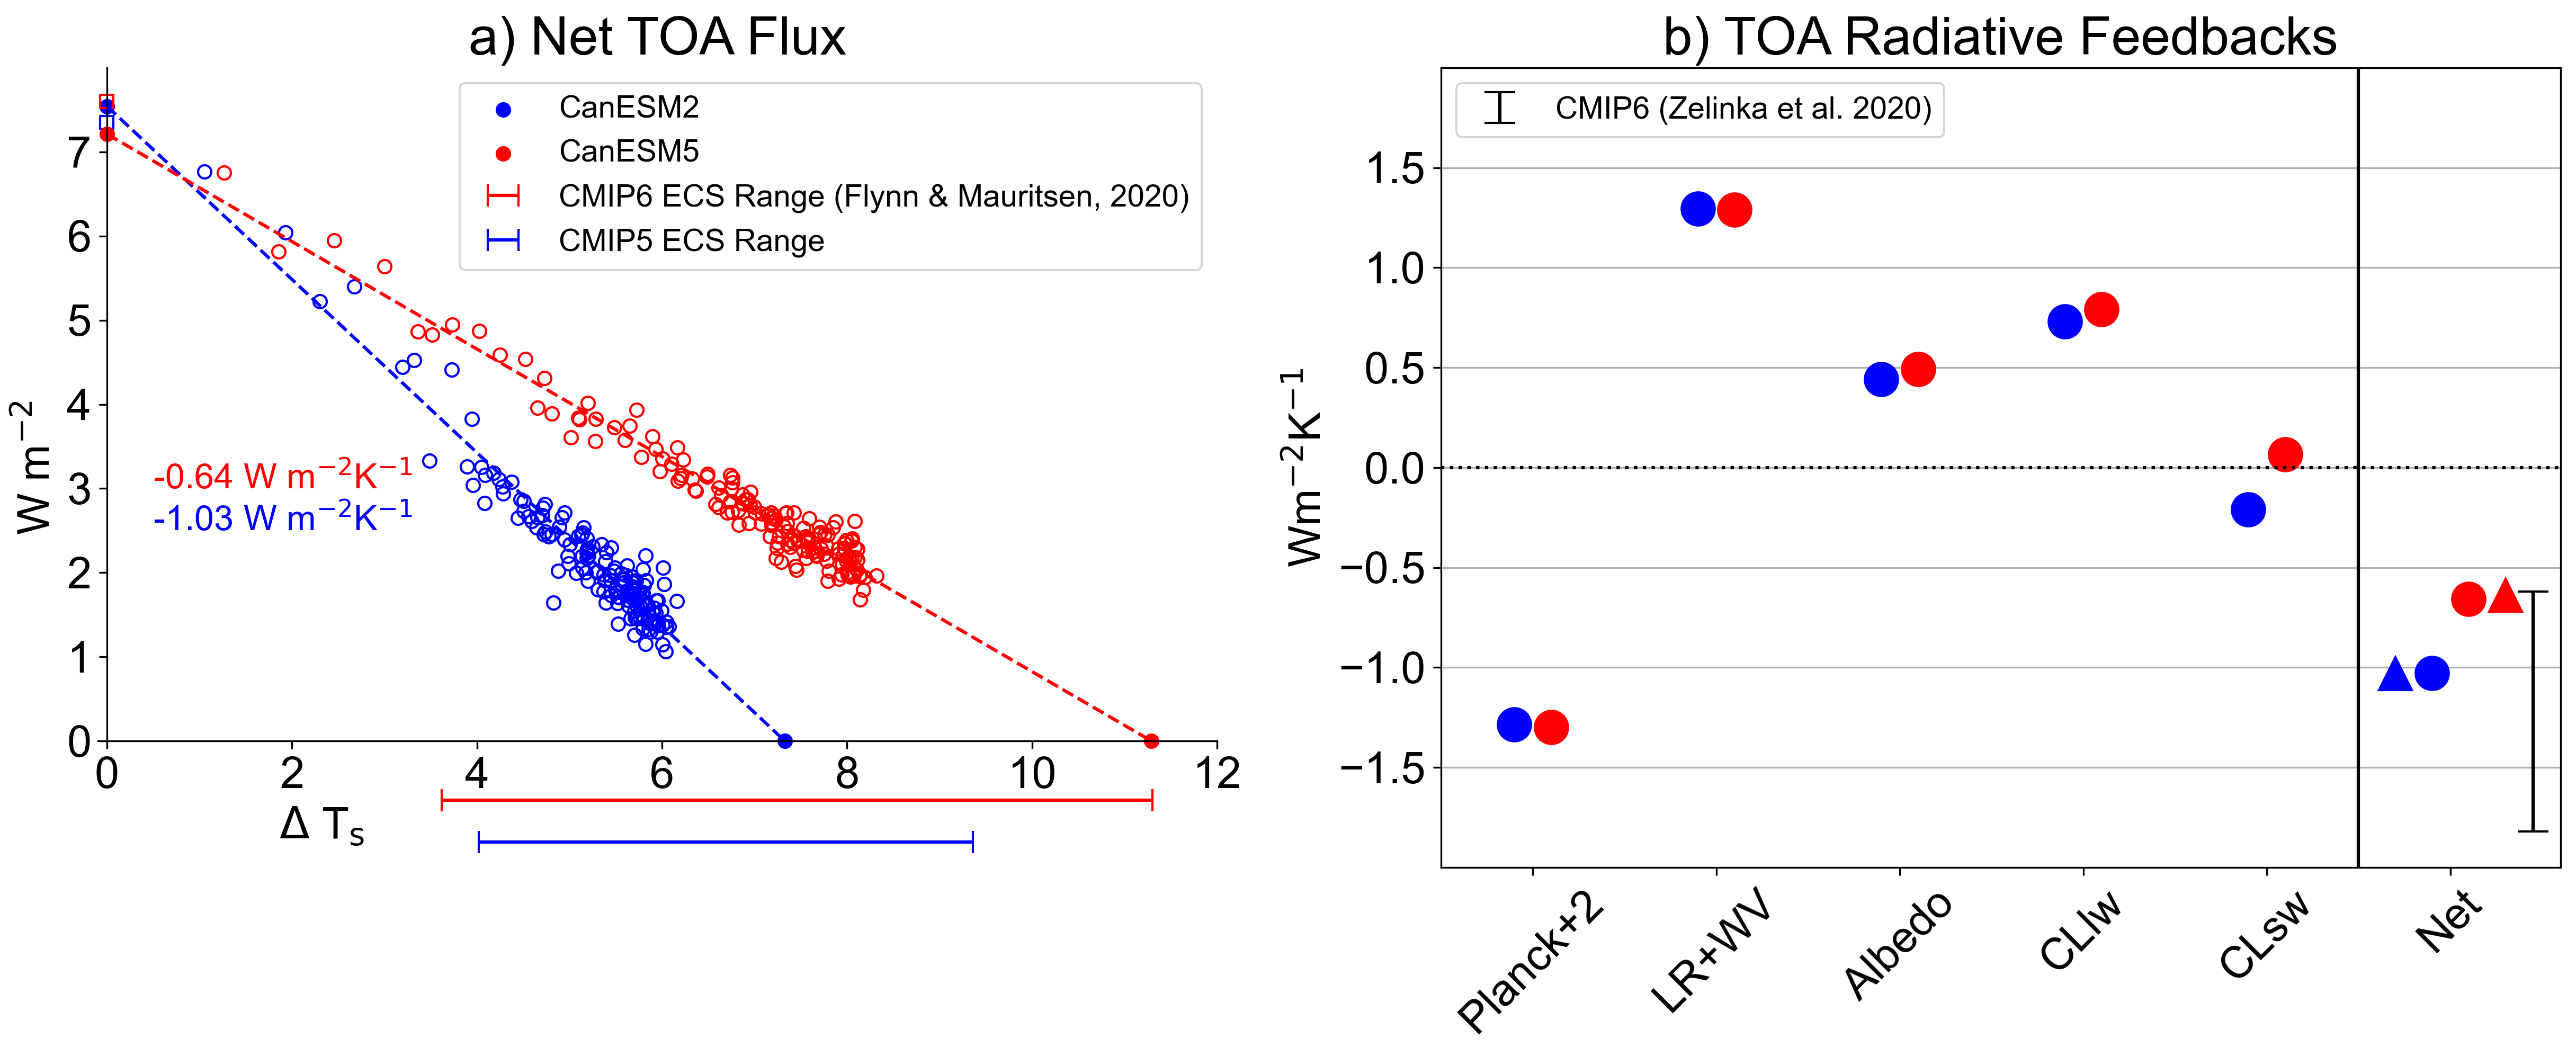

In [33]:
fig = plt.figure(figsize=(20,20/3),dpi=300)

color_ord = ['blue','red']
label_ord = ['CanESM2','CanESM5']

mods2 = ['CanESM2','CanESM5_p2']

plt.subplot(121)
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['left'].set_position(('data',0))
plt.gca().spines['left'].set_bounds(0, 8)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('a) Net TOA Flux',fontsize=24)
plt.xlabel('$\Delta$ T$_{\mathrm{s}}$',x=0.2,fontsize=20);
plt.ylabel('W m$^{-2}$',fontsize=20)

plt.ylim(-1.5,8)
plt.xlim(-0.1,12)
plt.yticks(range(0,8,1),fontsize=20)
plt.xticks(range(0,13,2),fontsize=20)

for i in range(2):
    plt.plot(tas[mods2[i]],FNET[mods2[i]],'o',color=color_ord[i],mfc='none')
    plt.scatter(ECS_greg[mods2[i]],0,color=color_ord[i])
    plt.scatter(0,ERF_greg[mods2[i]],color=color_ord[i],label=label_ord[i])
    plt.scatter(0,ERF_hans[mods2[i]],marker='s',color=color_ord[i],facecolor='none')
    plt.plot(np.linspace(0,ECS_greg[mods2[i]],50),line_greg[mods2[i]],color=color_ord[i],linestyle='--')

plt.text(0.5,2.5,'-1.03 W m$^{-2}$K$^{-1}$',color='blue',fontsize=16)
#plt.text(0.5,3,'-0.77 W m$^{-2}$K$^{-1}$',color='purple',fontsize=16)
plt.text(0.5,3,'-0.64 W m$^{-2}$K$^{-1}$',color='red',fontsize=16)

plt.errorbar(CMIP6_ECS_mid,-0.7,xerr=(CMIP6_ECS_max-CMIP6_ECS_min)/2,color='red',fmt='o',markersize=0,\
             capsize=5,label = 'CMIP6 ECS Range (Flynn & Mauritsen, 2020)')
plt.errorbar(CMIP5_ECS_mid,-1.2,xerr=(CMIP5_ECS_max-CMIP5_ECS_min)/2,color='blue',fmt='o',markersize=0,\
             capsize=5,label = 'CMIP5 ECS Range')

plt.legend(fontsize=14)

plt.subplot(122)
x_ticks = np.arange(0.5,5.51)
x_labels = ['Planck+2','LR+WV','Albedo','CLlw','CLsw','Net']
plt.title('b) TOA Radiative Feedbacks',fontsize=24)
plt.axvline(5,color='k')
plt.ylim(-2,2)
plt.yticks(np.arange(-1.5,1.6,0.5),fontsize=20)
plt.xlim(0,6.1)
plt.xticks(x_ticks,labels=x_labels,fontsize=20,rotation=45)
plt.ylabel('Wm$^{-2}$K$^{-1}$',fontsize=20)

#planck
plt.plot(0.5-0.1,data_GAM['CanESM2']['PLANCK']+2,'o',color='blue',markersize=15)
plt.plot(0.5+0.1,data_GAM['CanESM5_p2']['PLANCK']+2,'o',color='red',markersize=15)
#plt.plot(0.5+0.3,amip_GAM['PLANCK']+2,'X',color='red',markersize=15)

#LR+WV
plt.plot(1.5-0.1,\
         data_GAM['CanESM2']['TrWV']+data_GAM['CanESM2']['LAPSE'],'o',color='blue',\
         markersize=15)
plt.plot(1.5+0.1,\
         data_GAM['CanESM5_p2']['TrWV']+data_GAM['CanESM5_p2']['LAPSE'],'o',color='red',\
         markersize=15)
#plt.plot(1.5+0.3,\
#         amip_GAM['TrWV']+amip_GAM['LAPSE'],'X',color='red',\
#         markersize=15)        

#Albedo
plt.plot(2.5-0.1,data_GAM['CanESM2']['TrALB'],'o',color='blue',markersize=15)
plt.plot(2.5+0.1,data_GAM['CanESM5_p2']['TrALB'],'o',color='red',markersize=15)
#plt.plot(2.5+0.3,amip_GAM['TrALB'],'X',color='red',markersize=15)

#Cloud
plt.plot(3.5-0.1,data_GAM['CanESM2']['TrCLlw'],'o',color='blue',markersize=15)
plt.plot(3.5+0.1,data_GAM['CanESM5_p2']['TrCLlw'],'o',color='red',markersize=15)
#extra amip
#plt.plot(3.5+0.3,amip_GAM['TrCLlw'],'X',color='red',markersize=15)

plt.plot(4.5-0.1,data_GAM['CanESM2']['TrCLsw'],'o',color='blue',markersize=15)
plt.plot(4.5+0.1,data_GAM['CanESM5_p2']['TrCLsw'],'o',color='red',markersize=15)
#extra amip
#plt.plot(4.5+0.3,amip_GAM['TrCLsw'],'X',color='red',markersize=15)

#Net
plt.plot(5.5-0.1,data_GAM_sum['CanESM2'],'o',color='blue',markersize=15)
plt.plot(5.5+0.1,data_GAM_sum['CanESM5_p2'],'o',color='red',markersize=15)
#plt.plot(5.5+0.3,amip_GAM_sum,'X',color='red',markersize=15)

plt.plot(5.5-0.3,-1.03,'^',color='blue',markersize=15)
plt.plot(5.5+0.3,-0.64,'^',color='red',markersize=15)

plt.errorbar(5.5+0.45,-1.22,yerr=1.2/2,color='k',fmt='o',markersize=0,\
             capsize=7,label = 'CMIP6 (Zelinka et al. 2020)')

plt.legend(fontsize=14)
plt.grid(axis='y')
plt.axhline(0,color='black',linestyle=':')

plt.savefig('FLUXnet_scatter_FBdot_GAM.png',bbox_inches='tight');

fig = plt.figure(figsize=(10,20/3),dpi=300)
x_ticks = np.arange(0.5,4.51)
x_labels = ['Planck+2','LR+WV','Albedo','Cloud','Net']
plt.title('b) TOA Radiative Feedbacks',fontsize=20)
plt.axvline(4,color='k')
plt.ylim(-2,2)
plt.yticks(np.arange(-1.5,1.6,0.5))
plt.xlim(0,5.1)
plt.xticks(x_ticks,labels=x_labels,fontsize=16)
plt.ylabel('Wm$^{-2}$K$^{-1}$',fontsize=16)

#planck
plt.plot(0.5-0.1,data_GAM['CanESM2']['PLANCK'][0]+2,'o',color='blue',markersize=15)
plt.plot(0.5+0.1,data_GAM['CanESM5_p2']['PLANCK'][0]+2,'o',color='red',markersize=15)

#LR+WV
plt.plot(1.5-0.1,\
         data_GAM['CanESM2']['TrWV'][0]+data_GAM['CanESM2']['LAPSE'][0],'o',color='blue',\
         markersize=15)
plt.plot(1.5+0.1,\
         data_GAM['CanESM5_p2']['TrWV'][0]+data_GAM['CanESM5_p2']['LAPSE'][0],'o',color='red',\
         markersize=15)

#Albedo
plt.plot(2.5-0.1,data_GAM['CanESM2']['TrALB'][0],'o',color='blue',markersize=15)
plt.plot(2.5+0.1,data_GAM['CanESM5_p2']['TrALB'][0],'o',color='red',markersize=15)

#Cloud
plt.plot(3.5-0.1,data_GAM['CanESM2']['TrCL'][0],'o',color='blue',markersize=15)
plt.plot(3.5+0.1,data_GAM['CanESM5_p2']['TrCL'][0],'o',color='red',markersize=15)

#Net
plt.plot(4.5-0.1,data_GAM_sum['CanESM2'],'o',color='blue',markersize=15)
plt.plot(4.5+0.1,data_GAM_sum['CanESM5_p2'],'o',color='red',markersize=15)

plt.plot(4.5-0.3,-1.03,'^',color='blue',markersize=15)
plt.plot(4.5+0.3,-0.64,'^',color='red',markersize=15)

plt.errorbar(4.5+0.45,-1.22,yerr=1.2/2,color='k',fmt='o',markersize=0,\
             capsize=7,label = 'CMIP6 (Zelinka et al. 2020)')

plt.legend(fontsize=14)
plt.grid(axis='y')
plt.axhline(0,color='black',linestyle=':')

plt.savefig('box2_non_cld_fb.png',bbox_inches='tight')

In [18]:
fluxes_mn['CanESM2'].keys()

dict_keys(['DIR_FLUXCS', 'DIR_FLUX', 'TrCL_FLUX', 'TrCLlw_FLUX', 'TrCLsw_FLUX', 'LAPSE_FLUX', 'PLANCK_FLUX', 'SrTEMP_FLUX', 'SrWV_FLUX', 'TrWV_FLUX', 'TrALB_FLUX', 'LAPSE_FLUXCS', 'PLANCK_FLUXCS', 'SrTEMP_FLUXCS', 'SrWV_FLUXCS', 'TrWV_FLUXCS', 'TrALB_FLUXCS', 'TEMP_FLUX'])

fig = plt.figure(figsize=(20,20/3),dpi=300)

plt.subplot(121)
plt.title('a) Longwave Cloud',fontsize=20)
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['left'].set_position(('data',0))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(-1.5,8)
plt.xlim(-0.1,12)
plt.yticks(range(-1,8,1))
plt.xticks(range(0,13,2))
plt.ylabel('W m$^{-2}$',fontsize=16)
plt.xlabel('$\Delta$ T$_{\mathrm{s}}$',x=0.9,fontsize=16)

for i in range(2):
    plt.errorbar(tas[mods2[i]],fluxes_mn[mods2[i]]['TrCLlw_FLUX'],\
             yerr=fluxes_std[mods2[i]]['TrCLlw_FLUX'],ls="None",fmt='o',\
             mfc='none',color=color_ord[i],capsize=1.5,alpha=0.25)
    
    plt.plot(np.linspace(0,tas[mods2[i]][-1],50),pred[mods2[i]]['TrCLlw_FLUX'],\
             color=color_ord[i],linestyle='--',linewidth=2)
    
    plt.scatter(0,inter[mods2[i]]['TrCLlw_FLUX'],color=color_ord[i])

plt.text(0.5,3,'0.73 W m$^{-2}$K$^{-1}$',color='blue',fontsize=16)
#plt.text(0.5,3.5,'0.81 W m$^{-2}$K$^{-1}$',color='purple',fontsize=16)
plt.text(0.5,3.5,'0.79 W m$^{-2}$K$^{-1}$',color='red',fontsize=16)

plt.subplot(122)
plt.title('b) Shortwave Cloud',fontsize=20)
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['left'].set_position(('data',0))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(-1.5,8)
plt.xlim(-0.1,12)
plt.yticks(range(-1,8,1))
plt.xticks(range(0,13,2))
plt.ylabel('W m$^{-2}$',fontsize=16)
plt.xlabel('$\Delta$ T$_{\mathrm{s}}$',x=0.9,fontsize=16);

for i in range(2):
    plt.errorbar(tas[mods2[i]],fluxes_mn[mods2[i]]['TrCLsw_FLUX'],\
             yerr=fluxes_std[mods2[i]]['TrCLsw_FLUX'],ls="None",fmt='o',\
             mfc='none',color=color_ord[i],capsize=1.5,alpha=0.25)
    
    plt.plot(np.linspace(0,tas[mods2[i]][-1],50),pred[mods2[i]]['TrCLsw_FLUX'],\
             color=color_ord[i],linestyle='--',linewidth=2)
    
    plt.scatter(0,inter[mods2[i]]['TrCLsw_FLUX'],color=color_ord[i],label=label_ord[i])
    
#plt.legend(fontsize=16)

plt.text(0.5,3,'-0.21 W m$^{-2}$K$^{-1}$',color='blue',fontsize=16)
#plt.text(0.5,3.5,'-0.09 W m$^{-2}$K$^{-1}$',color='purple',fontsize=16)
plt.text(0.5,3.5,'0.06 W m$^{-2}$K$^{-1}$',color='red',fontsize=16)


plt.subplots_adjust(wspace=0.1)
#plt.savefig('FLUXcld_scatter_GAM.png',bbox_inches='tight');

## Cloud Kernel Based Fluxes

In [20]:
lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

mods = ['CanESM2','CanESM5_p2']

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

cldsw_fluxes = dict()
cldlw_fluxes = dict()

cldsw_fluxes_GAM = dict()
cldlw_fluxes_GAM = dict()

for m in range(len(mods)):
    cldsw_fluxes[mods[m]] = np.mean(pk.load(open(\
    Source+'Data/'+mods[m]+'/Fluxes/'+mods[m]+'_TrCLsw_FLUX_MZdecomp_Grid.pi','rb'))\
                                    ['Standard']['All'],axis=1)
    
    cldlw_fluxes[mods[m]] = np.mean(pk.load(open(\
    Source+'Data/'+mods[m]+'/Fluxes/'+mods[m]+'_TrCLlw_FLUX_MZdecomp_Grid.pi','rb'))\
                                    ['Standard']['All'],axis=1)
    
    if mods[m] == 'CanESM2':
        cldsw_fluxes_GAM[mods[m]] = np.zeros([41])
        cldlw_fluxes_GAM[mods[m]] = np.zeros([41])
    
        for i in range(41):
            cldsw_fluxes_GAM[mods[m]][i] = np.average(cldsw_fluxes[mods[m]][i],weights=coslat)
            cldlw_fluxes_GAM[mods[m]][i] = np.average(cldlw_fluxes[mods[m]][i],weights=coslat)
        
    else:
        cldsw_fluxes_GAM[mods[m]] = np.zeros([150])
        cldlw_fluxes_GAM[mods[m]] = np.zeros([150])
    
        for i in range(150):
            cldsw_fluxes_GAM[mods[m]][i] = np.average(cldsw_fluxes[mods[m]][i],weights=coslat)
            cldlw_fluxes_GAM[mods[m]][i] = np.average(cldlw_fluxes[mods[m]][i],weights=coslat)

In [21]:
tas_split = dict()
SW_split = dict()
LW_split = dict()
for m in range(len(mods)):
    tas_split[mods[m]] = np.concatenate((tas[mods[m]][0:20],tas[mods[m]][120:141]))
    if mods[m] == 'CanESM2':
        SW_split[mods[m]] = cldsw_fluxes_GAM[mods[m]]
        LW_split[mods[m]] = cldlw_fluxes_GAM[mods[m]]
    else:
        SW_split[mods[m]] = np.concatenate((cldsw_fluxes_GAM[mods[m]][0:20],\
                                        cldsw_fluxes_GAM[mods[m]][120:141]))
        LW_split[mods[m]] = np.concatenate((cldlw_fluxes_GAM[mods[m]][0:20],\
                                        cldlw_fluxes_GAM[mods[m]][120:141]))

In [22]:
alphas_cldlw_ker = dict()
inter_cldlw_ker = dict()
pred_cldlw_ker = dict()
for models in cldsw_fluxes_GAM.keys():
    if models == 'CanESM2':
        alphas_cldlw_ker[models],inter_cldlw_ker[models],pred_cldlw_ker[models] = \
        LinReg_wrap(cldlw_fluxes_GAM[models],tas_split[models].reshape(-1,1))
    else:
        alphas_cldlw_ker[models],inter_cldlw_ker[models],pred_cldlw_ker[models] = \
        LinReg_wrap(cldlw_fluxes_GAM[models],tas[models].reshape(-1,1))
        
alphas_cldlw_ker_split = dict()
inter_cldlw_ker_split = dict()
pred_cldlw_ker_split = dict()
for models in cldsw_fluxes_GAM.keys():
    alphas_cldlw_ker_split[models],inter_cldlw_ker_split[models],pred_cldlw_ker_split[models] = \
    LinReg_wrap(LW_split[models],tas_split[models].reshape(-1,1))

In [23]:
alphas_cldsw_ker = dict()
inter_cldsw_ker = dict()
pred_cldsw_ker = dict()
for models in cldsw_fluxes.keys():
    if models == 'CanESM2':
        alphas_cldsw_ker[models],inter_cldsw_ker[models],pred_cldsw_ker[models] = \
        LinReg_wrap(cldsw_fluxes_GAM[models],tas_split[models].reshape(-1,1))
    else:
        alphas_cldsw_ker[models],inter_cldsw_ker[models],pred_cldsw_ker[models] = \
        LinReg_wrap(cldsw_fluxes_GAM[models],tas[models].reshape(-1,1))
        
alphas_cldsw_ker_split = dict()
inter_cldsw_ker_split = dict()
pred_cldsw_ker_split = dict()
for models in cldsw_fluxes_GAM.keys():
    alphas_cldsw_ker_split[models],inter_cldsw_ker_split[models],pred_cldsw_ker_split[models] = \
    LinReg_wrap(SW_split[models],tas_split[models].reshape(-1,1))

In [24]:
alphas_cldsw_ker_split

{'CanESM2': array([-0.25775695]), 'CanESM5_p2': array([0.089452])}

In [25]:
alphas_cldlw_ker_split

{'CanESM2': array([0.74286763]), 'CanESM5_p2': array([0.71181295])}

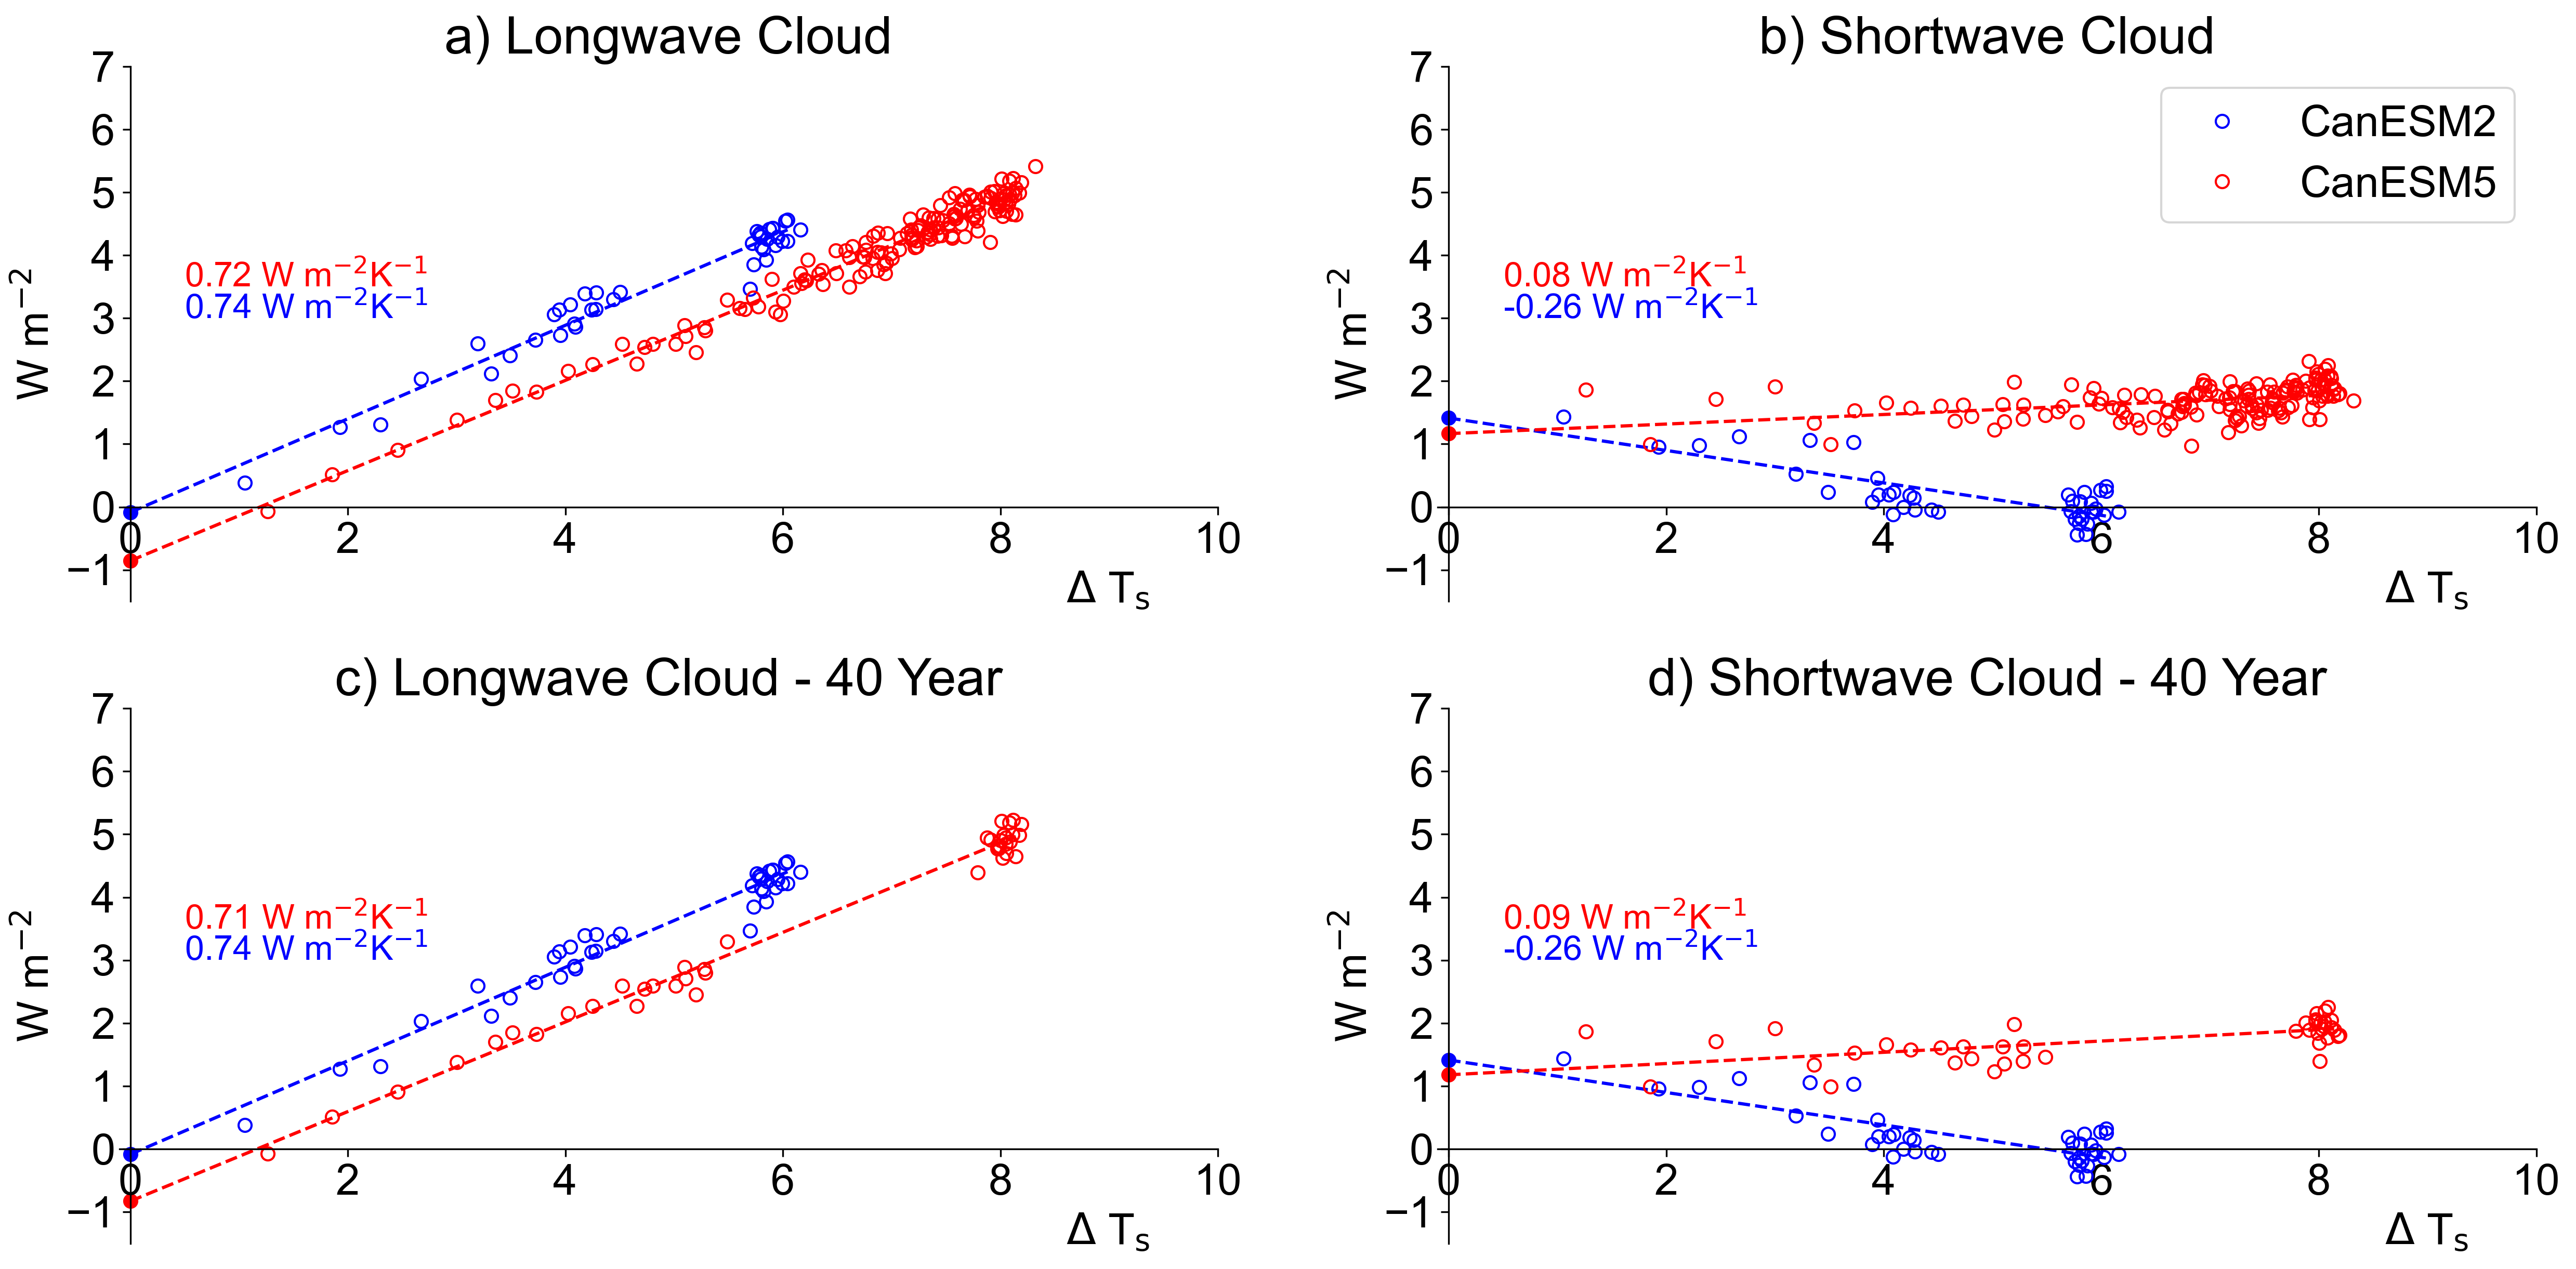

In [26]:
fig = plt.figure(figsize=(20,20/2),dpi=300)

color_ord = ['blue','red']
label_ord = ['CanESM2','CanESM5']

plt.subplot(221)
plt.title('a) Longwave Cloud',fontsize=24)
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['left'].set_position(('data',0))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(-1.5,7)
plt.xlim(-0.1,10)
plt.yticks(range(-1,8,1),fontsize=20)
plt.xticks(range(0,11,2),fontsize=20)
plt.ylabel('W m$^{-2}$',fontsize=20)
plt.xlabel('$\Delta$ T$_{\mathrm{s}}$',x=0.9,fontsize=20)

for i in range(2):
    if mods[i] == 'CanESM2':
        plt.plot(tas_split[mods[i]],cldlw_fluxes_GAM[mods[i]],'o',\
             mfc='none',color=color_ord[i])
    
        plt.plot(np.linspace(0,tas_split[mods[i]][-1],50),pred_cldlw_ker[mods[i]],\
             color=color_ord[i],linestyle='--')
    
        plt.scatter(0,inter_cldlw_ker[mods[i]],color=color_ord[i])
    else:
        plt.plot(tas[mods[i]],cldlw_fluxes_GAM[mods[i]],'o',\
             mfc='none',color=color_ord[i])
    
        plt.plot(np.linspace(0,tas[mods[i]][-1],50),pred_cldlw_ker[mods[i]],\
             color=color_ord[i],linestyle='--')
    
        plt.scatter(0,inter_cldlw_ker[mods[i]],color=color_ord[i])


plt.text(0.5,3,'0.74 W m$^{-2}$K$^{-1}$',color='blue',fontsize=16)
#plt.text(0.5,3.5,'0.76 W m$^{-2}$K$^{-1}$',color='purple',fontsize=16)
plt.text(0.5,3.5,'0.72 W m$^{-2}$K$^{-1}$',color='red',fontsize=16)

plt.subplot(222)
plt.title('b) Shortwave Cloud',fontsize=24)
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['left'].set_position(('data',0))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(-1.5,7)
plt.xlim(-0.1,10)
plt.yticks(range(-1,8,1),fontsize=20)
plt.xticks(range(0,11,2),fontsize=20)
plt.ylabel('W m$^{-2}$',fontsize=20)
plt.xlabel('$\Delta$ T$_{\mathrm{s}}$',x=0.9,fontsize=20);

for i in range(2):
    if mods[i] == 'CanESM2':
        plt.plot(tas_split[mods[i]],cldsw_fluxes_GAM[mods[i]],'o',\
             mfc='none',color=color_ord[i],label=label_ord[i])
    
        plt.plot(np.linspace(0,tas_split[mods[i]][-1],50),pred_cldsw_ker[mods[i]],\
             color=color_ord[i],linestyle='--')
    
        plt.scatter(0,inter_cldsw_ker[mods[i]],color=color_ord[i])
    else:
        plt.plot(tas[mods[i]],cldsw_fluxes_GAM[mods[i]],'o',\
             mfc='none',color=color_ord[i],label=label_ord[i])
    
        plt.plot(np.linspace(0,tas[mods[i]][-1],50),pred_cldsw_ker[mods[i]],\
             color=color_ord[i],linestyle='--')
    
        plt.scatter(0,inter_cldsw_ker[mods[i]],color=color_ord[i])

plt.text(0.5,3,'-0.26 W m$^{-2}$K$^{-1}$',color='blue',fontsize=16)
#plt.text(0.5,3.5,'-0.11 W m$^{-2}$K$^{-1}$',color='purple',fontsize=16)
plt.text(0.5,3.5,'0.08 W m$^{-2}$K$^{-1}$',color='red',fontsize=16)

plt.legend(fontsize=20)

plt.subplot(223)
plt.title('c) Longwave Cloud - 40 Year',fontsize=24)
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['left'].set_position(('data',0))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(-1.5,7)
plt.xlim(-0.1,10)
plt.yticks(range(-1,8,1),fontsize=20)
plt.xticks(range(0,11,2),fontsize=20)
plt.ylabel('W m$^{-2}$',fontsize=20)
plt.xlabel('$\Delta$ T$_{\mathrm{s}}$',x=0.9,fontsize=20)

for i in range(2):
    plt.plot(tas_split[mods[i]],LW_split[mods[i]],'o',\
             mfc='none',color=color_ord[i])
    
    plt.plot(np.linspace(0,tas_split[mods[i]][-1],50),pred_cldlw_ker_split[mods[i]],\
             color=color_ord[i],linestyle='--')
    
    plt.scatter(0,inter_cldlw_ker_split[mods[i]],color=color_ord[i])

plt.text(0.5,3,'0.74 W m$^{-2}$K$^{-1}$',color='blue',fontsize=16)
#plt.text(0.5,3.5,'0.74 W m$^{-2}$K$^{-1}$',color='purple',fontsize=16)
plt.text(0.5,3.5,'0.71 W m$^{-2}$K$^{-1}$',color='red',fontsize=16)

plt.subplot(224)
plt.title('d) Shortwave Cloud - 40 Year',fontsize=24)
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['left'].set_position(('data',0))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(-1.5,7)
plt.xlim(-0.1,10)
plt.yticks(range(-1,8,1),fontsize=20)
plt.xticks(range(0,11,2),fontsize=20)
plt.ylabel('W m$^{-2}$',fontsize=20)
plt.xlabel('$\Delta$ T$_{\mathrm{s}}$',x=0.9,fontsize=20);

for i in range(2):
    plt.plot(tas_split[mods[i]],SW_split[mods[i]],'o',\
             mfc='none',color=color_ord[i])
    
    plt.plot(np.linspace(0,tas_split[mods[i]][-1],50),pred_cldsw_ker_split[mods[i]],\
             color=color_ord[i],linestyle='--')
    
    plt.scatter(0,inter_cldsw_ker_split[mods[i]],color=color_ord[i])

plt.text(0.5,3,'-0.26 W m$^{-2}$K$^{-1}$',color='blue',fontsize=16)
#plt.text(0.5,3.5,'-0.09 W m$^{-2}$K$^{-1}$',color='purple',fontsize=16)
plt.text(0.5,3.5,'0.09 W m$^{-2}$K$^{-1}$',color='red',fontsize=16)

plt.savefig('cld_ker_flux_scatter_GAM.png',bbox_inches='tight')